In [33]:
# I'm using two datasets in this analysis. The first contains records
# of hate crimes committed on college or university campuses collected 
# and released under the Clery Act. The second contains undergraduate 
# racial demographic data for all schools with more than 1,000
# total students enrolled for the Fall 2013. 
# Both datasets are from the U.S. Department of Education.

# The idea is to find out if more diverse campuses
# record fewer racially-motivated hate crimes or 
# fewer hate crimes in general.

In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%pylab inline
import seaborn as sns
import statsmodels.formula.api as sm
# from sklearn.linear_model import LinearRegression
# import scipy, scipy.stats

Populating the interactive namespace from numpy and matplotlib


In [35]:
# Loading the on-campus hate crimes dataset into pandas
df = pd.read_csv('Oncampushate111213.csv')

In [36]:
# Dropping unneeded columns from on-campus hate crimes dataset
df.drop('FILTER11', axis=1, inplace=True)
df.drop('FILTER12', axis=1, inplace=True)
df.drop('FILTER13', axis=1, inplace=True)

In [37]:
# Finding columns with large numbers of null entries 
pd.set_option('display.max_rows', 300)
df.isnull().sum()

UNITID_P            0
INSTNM              0
BRANCH              0
Address             0
City                0
State             195
ZIP                42
sector_cd           0
Sector_desc         0
men_total          41
women_total        41
Total              41
MURD11           1174
MURD_RAC11       1174
MURD_REL11       1174
MURD_SEX11       1174
MURD_GEN11       1174
MURD_DIS11       1174
MURD_ETH11       1174
NEG_M11         11226
NEG_M_RAC11     11226
NEG_M_REL11     11226
NEG_M_SEX11     11226
NEG_M_GEN11     11226
NEG_M_DIS11     11226
NEG_M_ETH11     11226
FORCIB11         1174
FORCIB_RAC11     1174
FORCIB_REL11     1174
FORCIB_SEX11     1174
FORCIB_GEN11     1174
FORCIB_DIS11     1174
FORCIB_ETH11     1174
NONFOR11         1174
NONFOR_RAC11     1174
NONFOR_REL11     1174
NONFOR_SEX11     1174
NONFOR_GEN11     1174
NONFOR_DIS11     1174
NONFOR_ETH11     1174
ROBBE11          1174
ROBBE_RAC11      1174
ROBBE_REL11      1174
ROBBE_SEX11      1174
ROBBE_GEN11      1174
ROBBE_DIS1

In [38]:
# It seems like almost every school doesn't report negligent manslaughters, so I'll delete those columns.
df.drop('NEG_M11', axis=1, inplace=True)
df.drop('NEG_M12', axis=1, inplace=True)
df.drop('NEG_M13', axis=1, inplace=True)
df.drop('NEG_M_RAC11', axis=1, inplace=True)
df.drop('NEG_M_RAC12', axis=1, inplace=True)
df.drop('NEG_M_RAC13', axis=1, inplace=True)
df.drop('NEG_M_REL11', axis=1, inplace=True)
df.drop('NEG_M_REL12', axis=1, inplace=True)
df.drop('NEG_M_REL13', axis=1, inplace=True)
df.drop('NEG_M_SEX11', axis=1, inplace=True)
df.drop('NEG_M_SEX12', axis=1, inplace=True)
df.drop('NEG_M_SEX13', axis=1, inplace=True)
df.drop('NEG_M_GEN11', axis=1, inplace=True)
df.drop('NEG_M_GEN12', axis=1, inplace=True)
df.drop('NEG_M_GEN13', axis=1, inplace=True)
df.drop('NEG_M_DIS11', axis=1, inplace=True)
df.drop('NEG_M_DIS12', axis=1, inplace=True)
df.drop('NEG_M_DIS13', axis=1, inplace=True)
df.drop('NEG_M_ETH11', axis=1, inplace=True)
df.drop('NEG_M_ETH12', axis=1, inplace=True)
df.drop('NEG_M_ETH13', axis=1, inplace=True)

In [39]:
# Figuring out which rows have 'state' null entries
statenulls = df[df['State'].isnull()]
statenulls
# They're international campuses. Not a problem to exclude them in analysis.

,UNITID_P,INSTNM,BRANCH,Address,City,State,ZIP,sector_cd,Sector_desc,men_total,...,INTIM_GEN13,INTIM_DIS13,INTIM_ETH13,VANDAL13,VANDAL_RAC13,VANDAL_REL13,VANDAL_SEX13,VANDAL_GEN13,VANDAL_DIS13,VANDAL_ETH13
318,107044004,Harding University,Harding University-Athens Greece,37 KLM Porto Rafti Avenue,Markopoulo Attiki,NaN,19003,2,"Private nonprofit, 4-year or above",2677,...,0,0,0,0,0,0,0,0,0,0
319,107044005,Harding University,Harding University-Florence Italy,Via Triozzi 57,Scandicci Firenze,NaN,50018,2,"Private nonprofit, 4-year or above",2677,...,0,0,0,0,0,0,0,0,0,0
321,107044007,Harding University,Harding University Australasia - HUA,"Main Beach LPO, P.O.Box 766",Main Beach QLD 4217,NaN,NaN,2,"Private nonprofit, 4-year or above",2677,...,0,0,0,0,0,0,0,0,0,0
322,107044008,Harding University,Harding University Paris (HIP),"Harding University C/O Hotel Nouvel Horizen, 2...",Toulouse,NaN,NaN,2,"Private nonprofit, 4-year or above",2677,...,0,0,0,0,0,0,0,0,0,0
323,107044009,Harding University,Harding University Latin America (HULA) Chile,"Iberia 390, Cerro Castillo",Vina del Mar,NaN,NaN,2,"Private nonprofit, 4-year or above",2677,...,0,0,0,0,0,0,0,0,0,0
324,107044010,Harding University,Harding University Zambia (HIZ),"Namwianga Mission, PO Box 620022",Kalomo,NaN,NaN,2,"Private nonprofit, 4-year or above",2677,...,0,0,0,0,0,0,0,0,0,0
325,107044011,Harding University,Harding University England (HUE),"C/O Florida State, 103 Great Russell Street",London WC1B 3LA,NaN,NaN,2,"Private nonprofit, 4-year or above",2677,...,0,0,0,0,0,0,0,0,0,0
334,107141005,John Brown University,Ireland Center,157 Finaghy Road South,Belfast,NaN,BT1O ODA,2,"Private nonprofit, 4-year or above",1100,...,0,0,0,0,0,0,0,0,0,0
416,110097014,Biola University,Heidelberg,Heiliggeistrasse 17,Heidelberg,NaN,69117,2,"Private nonprofit, 4-year or above",2940,...,0,0,0,0,0,0,0,0,0,0
417,110097015,Biola University,Kyiv,75 Gorlivska Street,Kyiv,NaN,02091,2,"Private nonprofit, 4-year or above",2940,...,0,0,0,0,0,0,0,0,0,0


In [40]:
# Figuring out which rows have 'Total' null entries (same number of nulls as many other columns)
totalnulls = df[df['Total'].isnull()]
totalnulls
# Not really the campuses I'm looking for. Also not a problem to exclude.

,UNITID_P,INSTNM,BRANCH,Address,City,State,ZIP,sector_cd,Sector_desc,men_total,...,INTIM_GEN13,INTIM_DIS13,INTIM_ETH13,VANDAL13,VANDAL_RAC13,VANDAL_REL13,VANDAL_SEX13,VANDAL_GEN13,VANDAL_DIS13,VANDAL_ETH13
1873,144500001,City Colleges of Chicago-District Office,District Office,226 W. Jackson Blvd.,Chicago,IL,606066998,0,Administrative Unit Only,NaN,...,0,0,0,0,0,0,0,0,0,0
2192,151157001,Harrison College-Anderson,Harrison College-Anderson Campus,140 E 53RD ST,ANDERSON,IN,46013,3,"Private for-profit, 4-year or above",NaN,...,0,0,0,0,0,0,0,0,0,0
2194,151193001,Harrison College-Columbus,Main Campus,2222 POSHARD DRIVE,COLUMBUS,IN,472031843,3,"Private for-profit, 4-year or above",NaN,...,0,0,0,0,0,0,0,0,0,0
2195,151236001,Harrison College-Terre Haute,Terre Haute Campus,1378 South SR 46,Terre Haute,IN,47803,3,"Private for-profit, 4-year or above",NaN,...,0,0,0,0,0,0,0,0,0,0
2196,151245001,Harrison College-Lafayette,Main Campus,4705 Meijer Court,LAFAYETTE,IN,47905,3,"Private for-profit, 4-year or above",NaN,...,0,0,0,0,0,0,0,0,0,0
2981,163842001,St Mary's Seminary & University,St.Mary's Seminary &Univ.,5400 ROLAND AVE,BALTIMORE,MD,212101994,2,"Private nonprofit, 4-year or above",NaN,...,0,0,0,0,0,0,0,0,0,0
3994,180045001,Montana State University-Billings City Collge,CITY COLLEGE,3803 CENTRAL AVE,BILLINGS,MT,591029856,4,"Public, 2-year",NaN,...,0,0,0,0,0,0,0,0,0,0
8174,384360001,Georgia Military College-Augusta Campus,Martinez Campus,115 DAVIS ROAD,MARTINEZ,GA,30907,4,"Public, 2-year",NaN,...,0,0,0,0,0,0,0,0,0,0
8175,384379001,Georgia Military College-Valdosta Campus,Valdosta Campus,4201 N Forrest Street,VALDOSTA,GA,31605,4,"Public, 2-year",NaN,...,0,0,0,0,0,0,0,0,0,0
8176,384388001,Georgia Military College-Atlanta Campus,Atlanta / Fairburn Campus,320 West Broad Street,Fairburn,GA,30213,4,"Public, 2-year",NaN,...,0,0,0,0,0,0,0,0,0,0


In [41]:
# Figuring out which rows have null entries in the murder categories for 2011
# pd.set_option('display.max_rows', 1175)
elevennulls = df[df['MURD11'].isnull()]
elevennulls
# Lots of international/secondary campuses, online school brick-and-mortar locations and 
# community colleges, which aren't really what I'm after in this analysis.
# I'll exclude these as well.

,UNITID_P,INSTNM,BRANCH,Address,City,State,ZIP,sector_cd,Sector_desc,men_total,...,INTIM_GEN13,INTIM_DIS13,INTIM_ETH13,VANDAL13,VANDAL_RAC13,VANDAL_REL13,VANDAL_SEX13,VANDAL_GEN13,VANDAL_DIS13,VANDAL_ETH13
27,101277001,New Beginning College of Cosmetology,Main Campus,421 Martling Rd,Albertville,AL,35951,9,"Private for-profit, less-than 2-year",1,...,0,0,0,0,0,0,0,0,0,0
93,102553006,University of Alaska Anchorage,Chugiak-Eagle River Campus,"10928 Eagle River Road, Ste. 115",Eagle River,AK,99577,1,"Public, 4-year or above",7086,...,0,0,1,0,0,0,0,0,0,0
127,103811002,American Institute of Technology,American Institute of Trucking-Denver,9239 Brighton Road Unit 201,Henderson,CO,80640,9,"Private for-profit, less-than 2-year",250,...,0,0,0,0,0,0,0,0,0,0
128,103811003,American Institute of Technology,American Institute of Trucking žLas Vegas,4020 E. Lone Mountain Road,N. Las Vegas,NV,89081,9,"Private for-profit, less-than 2-year",250,...,0,0,0,0,0,0,0,0,0,0
140,104151005,Arizona State University-Tempe,Lake Havasu City Campus,100 University Way,Lake Havasu,AZ,86404,1,"Public, 4-year or above",27532,...,0,0,0,0,0,0,0,0,0,0
156,104346012,Central Arizona College,Maricopa Campus,17945 N. Regent Drive,Maricopa,AZ,851387808,4,"Public, 2-year",2377,...,0,0,0,0,0,0,0,0,0,0
193,105330002,Northern Arizona University,Apache Junction Campus,805 South Idaho Rd,Apache Junction,AZ,85119,1,"Public, 4-year or above",10799,...,0,0,0,0,0,0,0,0,0,0
194,105330003,Northern Arizona University,NAU- Chandler-Gilbert,2626 East Pecos Rd,Chandler,AZ,85225,1,"Public, 4-year or above",10799,...,0,0,0,0,0,0,0,0,0,0
195,105330005,Northern Arizona University,NAU - Mesa,1833 West Southern Ave,Mesa,AZ,85202,1,"Public, 4-year or above",10799,...,0,0,0,0,0,0,0,0,0,0
196,105330006,Northern Arizona University,NAU - West Valley,3000 North Dysart Rd,Avondale,AZ,85392,1,"Public, 4-year or above",10799,...,0,0,0,0,0,0,0,0,0,0


In [42]:
# Checking to see which campuses have nulls for 2012 data
twelvenulls = df[df['MURD12'].isnull()]
twelvenulls
# Again, lots of international/secondary campuses, online school 
# brick-and-mortar locations and community colleges. 
# I'll exclude these, too.

,UNITID_P,INSTNM,BRANCH,Address,City,State,ZIP,sector_cd,Sector_desc,men_total,...,INTIM_GEN13,INTIM_DIS13,INTIM_ETH13,VANDAL13,VANDAL_RAC13,VANDAL_REL13,VANDAL_SEX13,VANDAL_GEN13,VANDAL_DIS13,VANDAL_ETH13
127,103811002,American Institute of Technology,American Institute of Trucking-Denver,9239 Brighton Road Unit 201,Henderson,CO,80640,9,"Private for-profit, less-than 2-year",250,...,0,0,0,0,0,0,0,0,0,0
128,103811003,American Institute of Technology,American Institute of Trucking žLas Vegas,4020 E. Lone Mountain Road,N. Las Vegas,NV,89081,9,"Private for-profit, less-than 2-year",250,...,0,0,0,0,0,0,0,0,0,0
140,104151005,Arizona State University-Tempe,Lake Havasu City Campus,100 University Way,Lake Havasu,AZ,86404,1,"Public, 4-year or above",27532,...,0,0,0,0,0,0,0,0,0,0
156,104346012,Central Arizona College,Maricopa Campus,17945 N. Regent Drive,Maricopa,AZ,851387808,4,"Public, 2-year",2377,...,0,0,0,0,0,0,0,0,0,0
211,105330022,Northern Arizona University,Kayenta Business Center Campus,KPS Mesa View Rd,Kayenta,AZ,86033,1,"Public, 4-year or above",10799,...,0,0,0,0,0,0,0,0,0,0
212,105330023,Northern Arizona University,Communiversity At Surprise,15950 N Civic Center Plaza,Surprise,AZ,85374,1,"Public, 4-year or above",10799,...,0,0,0,0,0,0,0,0,0,0
213,105330025,Northern Arizona University,Phoenix Biomedical Campus,435 N 5th Street,Phoenix,AZ,85004,1,"Public, 4-year or above",10799,...,0,0,0,0,0,0,0,0,0,0
214,105330027,Northern Arizona University,NAU In Costa Rica,S San Francisco St,Flagstaff,AZ,86011,1,"Public, 4-year or above",10799,...,0,0,0,0,0,0,0,0,0,0
290,106351003,Arkansas College of Barbering and Hair Design,Arkansas College of Barbering and Hair Design,8521 Geyer Springs Rd Unit 30,Little Rock,AR,72209,9,"Private for-profit, less-than 2-year",77,...,0,0,0,0,0,0,0,0,0,0
333,107141004,John Brown University,Little Rock Center,"8114 Cantrell Road, Suite 250",Little Rock,AR,72227,2,"Private nonprofit, 4-year or above",1100,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# Cleaning data by deleting rows with nulls,
# leaving me with 9882 entries in the dataframe.
stateclean = df[df['State'].notnull()]
totalclean = stateclean[stateclean['Total'].notnull()]
elevenclean = totalclean[totalclean['MURD11'].notnull()]
crimeclean = elevenclean[elevenclean['MURD12'].notnull()]

In [44]:
# Creating a new column with the total number of hate crimes 
# involving race or ethnicity for each campus. 
col_list1=list(crimeclean)
# col_list1
col_list1.remove('UNITID_P')
col_list1.remove('INSTNM')
col_list1.remove('BRANCH')
col_list1.remove('Address')
col_list1.remove('City')
col_list1.remove('State')
col_list1.remove('ZIP')
col_list1.remove('sector_cd')
col_list1.remove('Sector_desc')
col_list1.remove('men_total')
col_list1.remove('women_total')
col_list1.remove('Total')
col_list1.remove('MURD11')
col_list1.remove('MURD_REL11')
col_list1.remove('MURD_SEX11')
col_list1.remove('MURD_GEN11')
col_list1.remove('MURD_DIS11')
col_list1.remove('FORCIB11')
col_list1.remove('FORCIB_REL11')
col_list1.remove('FORCIB_SEX11')
col_list1.remove('FORCIB_GEN11')
col_list1.remove('FORCIB_DIS11')
col_list1.remove('NONFOR11')
col_list1.remove('NONFOR_REL11')
col_list1.remove('NONFOR_SEX11')
col_list1.remove('NONFOR_GEN11')
col_list1.remove('NONFOR_DIS11')
col_list1.remove('ROBBE11')
col_list1.remove('ROBBE_REL11')
col_list1.remove('ROBBE_SEX11')
col_list1.remove('ROBBE_GEN11')
col_list1.remove('ROBBE_DIS11')
col_list1.remove('AGG_A11')
col_list1.remove('AGG_A_REL11')
col_list1.remove('AGG_A_SEX11')
col_list1.remove('AGG_A_GEN11')
col_list1.remove('AGG_A_DIS11')
col_list1.remove('BURGLA11')
col_list1.remove('BURGLA_REL11')
col_list1.remove('BURGLA_SEX11')
col_list1.remove('BURGLA_GEN11')
col_list1.remove('BURGLA_DIS11')
col_list1.remove('VEHIC11')
col_list1.remove('VEHIC_REL11')
col_list1.remove('VEHIC_SEX11')
col_list1.remove('VEHIC_GEN11')
col_list1.remove('VEHIC_DIS11')
col_list1.remove('ARSON11')
col_list1.remove('ARSON_REL11')
col_list1.remove('ARSON_SEX11')
col_list1.remove('ARSON_GEN11')
col_list1.remove('ARSON_DIS11')
col_list1.remove('SIM_A11')
col_list1.remove('SIM_A_REL11')
col_list1.remove('SIM_A_SEX11')
col_list1.remove('SIM_A_GEN11')
col_list1.remove('SIM_A_DIS11')
col_list1.remove('LAR_T11')
col_list1.remove('LAR_T_REL11')
col_list1.remove('LAR_T_SEX11')
col_list1.remove('LAR_T_GEN11')
col_list1.remove('LAR_T_DIS11')
col_list1.remove('INTIM11')
col_list1.remove('INTIM_REL11')
col_list1.remove('INTIM_SEX11')
col_list1.remove('INTIM_GEN11')
col_list1.remove('INTIM_DIS11')
col_list1.remove('VANDAL11')
col_list1.remove('VANDAL_REL11')
col_list1.remove('VANDAL_SEX11')
col_list1.remove('VANDAL_GEN11')
col_list1.remove('VANDAL_DIS11')
col_list1.remove('MURD12')
col_list1.remove('MURD_REL12')
col_list1.remove('MURD_SEX12')
col_list1.remove('MURD_GEN12')
col_list1.remove('MURD_DIS12')
col_list1.remove('FORCIB12')
col_list1.remove('FORCIB_REL12')
col_list1.remove('FORCIB_SEX12')
col_list1.remove('FORCIB_GEN12')
col_list1.remove('FORCIB_DIS12')
col_list1.remove('NONFOR12')
col_list1.remove('NONFOR_REL12')
col_list1.remove('NONFOR_SEX12')
col_list1.remove('NONFOR_GEN12')
col_list1.remove('NONFOR_DIS12')
col_list1.remove('ROBBE12')
col_list1.remove('ROBBE_REL12')
col_list1.remove('ROBBE_SEX12')
col_list1.remove('ROBBE_GEN12')
col_list1.remove('ROBBE_DIS12')
col_list1.remove('AGG_A12')
col_list1.remove('AGG_A_REL12')
col_list1.remove('AGG_A_SEX12')
col_list1.remove('AGG_A_GEN12')
col_list1.remove('AGG_A_DIS12')
col_list1.remove('BURGLA12')
col_list1.remove('BURGLA_REL12')
col_list1.remove('BURGLA_SEX12')
col_list1.remove('BURGLA_GEN12')
col_list1.remove('BURGLA_DIS12')
col_list1.remove('VEHIC12')
col_list1.remove('VEHIC_REL12')
col_list1.remove('VEHIC_SEX12')
col_list1.remove('VEHIC_GEN12')
col_list1.remove('VEHIC_DIS12')
col_list1.remove('ARSON12')
col_list1.remove('ARSON_REL12')
col_list1.remove('ARSON_SEX12')
col_list1.remove('ARSON_GEN12')
col_list1.remove('ARSON_DIS12')
col_list1.remove('SIM_A12')
col_list1.remove('SIM_A_REL12')
col_list1.remove('SIM_A_SEX12')
col_list1.remove('SIM_A_GEN12')
col_list1.remove('SIM_A_DIS12')
col_list1.remove('LAR_T12')
col_list1.remove('LAR_T_REL12')
col_list1.remove('LAR_T_SEX12')
col_list1.remove('LAR_T_GEN12')
col_list1.remove('LAR_T_DIS12')
col_list1.remove('INTIM12')
col_list1.remove('INTIM_REL12')
col_list1.remove('INTIM_SEX12')
col_list1.remove('INTIM_GEN12')
col_list1.remove('INTIM_DIS12')
col_list1.remove('VANDAL12')
col_list1.remove('VANDAL_REL12')
col_list1.remove('VANDAL_SEX12')
col_list1.remove('VANDAL_GEN12')
col_list1.remove('VANDAL_DIS12')
col_list1.remove('MURD13')
col_list1.remove('MURD_REL13')
col_list1.remove('MURD_SEX13')
col_list1.remove('MURD_GEN13')
col_list1.remove('MURD_DIS13')
col_list1.remove('FORCIB13')
col_list1.remove('FORCIB_REL13')
col_list1.remove('FORCIB_SEX13')
col_list1.remove('FORCIB_GEN13')
col_list1.remove('FORCIB_DIS13')
col_list1.remove('NONFOR13')
col_list1.remove('NONFOR_REL13')
col_list1.remove('NONFOR_SEX13')
col_list1.remove('NONFOR_GEN13')
col_list1.remove('NONFOR_DIS13')
col_list1.remove('ROBBE13')
col_list1.remove('ROBBE_REL13')
col_list1.remove('ROBBE_SEX13')
col_list1.remove('ROBBE_GEN13')
col_list1.remove('ROBBE_DIS13')
col_list1.remove('AGG_A13')
col_list1.remove('AGG_A_REL13')
col_list1.remove('AGG_A_SEX13')
col_list1.remove('AGG_A_GEN13')
col_list1.remove('AGG_A_DIS13')
col_list1.remove('BURGLA13')
col_list1.remove('BURGLA_REL13')
col_list1.remove('BURGLA_SEX13')
col_list1.remove('BURGLA_GEN13')
col_list1.remove('BURGLA_DIS13')
col_list1.remove('VEHIC13')
col_list1.remove('VEHIC_REL13')
col_list1.remove('VEHIC_SEX13')
col_list1.remove('VEHIC_GEN13')
col_list1.remove('VEHIC_DIS13')
col_list1.remove('ARSON13')
col_list1.remove('ARSON_REL13')
col_list1.remove('ARSON_SEX13')
col_list1.remove('ARSON_GEN13')
col_list1.remove('ARSON_DIS13')
col_list1.remove('SIM_A13')
col_list1.remove('SIM_A_REL13')
col_list1.remove('SIM_A_SEX13')
col_list1.remove('SIM_A_GEN13')
col_list1.remove('SIM_A_DIS13')
col_list1.remove('LAR_T13')
col_list1.remove('LAR_T_REL13')
col_list1.remove('LAR_T_SEX13')
col_list1.remove('LAR_T_GEN13')
col_list1.remove('LAR_T_DIS13')
col_list1.remove('INTIM13')
col_list1.remove('INTIM_REL13')
col_list1.remove('INTIM_SEX13')
col_list1.remove('INTIM_GEN13')
col_list1.remove('INTIM_DIS13')
col_list1.remove('VANDAL13')
col_list1.remove('VANDAL_REL13')
col_list1.remove('VANDAL_SEX13')
col_list1.remove('VANDAL_GEN13')
col_list1.remove('VANDAL_DIS13')

crimeclean.loc[:, 'total_race/eth'] = crimeclean[col_list1].sum(axis=1)


In [45]:
# Creating column with total number of hate crimes for each entry. 
col_list2=list(crimeclean)
col_list2.remove('UNITID_P')
col_list2.remove('INSTNM')
col_list2.remove('BRANCH')
col_list2.remove('Address')
col_list2.remove('City')
col_list2.remove('State')
col_list2.remove('ZIP')
col_list2.remove('sector_cd')
col_list2.remove('Sector_desc')
col_list2.remove('men_total')
col_list2.remove('women_total')
col_list2.remove('Total')
col_list2.remove('MURD_RAC11')
col_list2.remove('MURD_REL11')
col_list2.remove('MURD_SEX11')
col_list2.remove('MURD_GEN11')
col_list2.remove('MURD_DIS11')
col_list2.remove('MURD_ETH11')
col_list2.remove('FORCIB_RAC11')
col_list2.remove('FORCIB_REL11')
col_list2.remove('FORCIB_SEX11')
col_list2.remove('FORCIB_GEN11')
col_list2.remove('FORCIB_DIS11')
col_list2.remove('FORCIB_ETH11')
col_list2.remove('NONFOR_RAC11')
col_list2.remove('NONFOR_REL11')
col_list2.remove('NONFOR_SEX11')
col_list2.remove('NONFOR_GEN11')
col_list2.remove('NONFOR_DIS11')
col_list2.remove('NONFOR_ETH11')
col_list2.remove('ROBBE_RAC11')
col_list2.remove('ROBBE_REL11')
col_list2.remove('ROBBE_SEX11')
col_list2.remove('ROBBE_GEN11')
col_list2.remove('ROBBE_DIS11')
col_list2.remove('ROBBE_ETH11')
col_list2.remove('AGG_A_RAC11')
col_list2.remove('AGG_A_REL11')
col_list2.remove('AGG_A_SEX11')
col_list2.remove('AGG_A_GEN11')
col_list2.remove('AGG_A_DIS11')
col_list2.remove('AGG_A_ETH11')
col_list2.remove('BURGLA_RAC11')
col_list2.remove('BURGLA_REL11')
col_list2.remove('BURGLA_SEX11')
col_list2.remove('BURGLA_GEN11')
col_list2.remove('BURGLA_DIS11')
col_list2.remove('BURGLA_ETH11')
col_list2.remove('VEHIC_RAC11')
col_list2.remove('VEHIC_REL11')
col_list2.remove('VEHIC_SEX11')
col_list2.remove('VEHIC_GEN11')
col_list2.remove('VEHIC_DIS11')
col_list2.remove('VEHIC_ETH11')
col_list2.remove('ARSON_RAC11')
col_list2.remove('ARSON_REL11')
col_list2.remove('ARSON_SEX11')
col_list2.remove('ARSON_GEN11')
col_list2.remove('ARSON_DIS11')
col_list2.remove('ARSON_ETH11')
col_list2.remove('SIM_A_RAC11')
col_list2.remove('SIM_A_REL11')
col_list2.remove('SIM_A_SEX11')
col_list2.remove('SIM_A_GEN11')
col_list2.remove('SIM_A_DIS11')
col_list2.remove('SIM_A_ETH11')
col_list2.remove('LAR_T_RAC11')
col_list2.remove('LAR_T_REL11')
col_list2.remove('LAR_T_SEX11')
col_list2.remove('LAR_T_GEN11')
col_list2.remove('LAR_T_DIS11')
col_list2.remove('LAR_T_ETH11')
col_list2.remove('INTIM_RAC11')
col_list2.remove('INTIM_REL11')
col_list2.remove('INTIM_SEX11')
col_list2.remove('INTIM_GEN11')
col_list2.remove('INTIM_DIS11')
col_list2.remove('INTIM_ETH11')
col_list2.remove('VANDAL_RAC11')
col_list2.remove('VANDAL_REL11')
col_list2.remove('VANDAL_SEX11')
col_list2.remove('VANDAL_GEN11')
col_list2.remove('VANDAL_DIS11')
col_list2.remove('VANDAL_ETH11')
col_list2.remove('MURD_RAC12')
col_list2.remove('MURD_REL12')
col_list2.remove('MURD_SEX12')
col_list2.remove('MURD_GEN12')
col_list2.remove('MURD_DIS12')
col_list2.remove('MURD_ETH12')
col_list2.remove('FORCIB_RAC12')
col_list2.remove('FORCIB_REL12')
col_list2.remove('FORCIB_SEX12')
col_list2.remove('FORCIB_GEN12')
col_list2.remove('FORCIB_DIS12')
col_list2.remove('FORCIB_ETH12')
col_list2.remove('NONFOR_RAC12')
col_list2.remove('NONFOR_REL12')
col_list2.remove('NONFOR_SEX12')
col_list2.remove('NONFOR_GEN12')
col_list2.remove('NONFOR_DIS12')
col_list2.remove('NONFOR_ETH12')
col_list2.remove('ROBBE_RAC12')
col_list2.remove('ROBBE_REL12')
col_list2.remove('ROBBE_SEX12')
col_list2.remove('ROBBE_GEN12')
col_list2.remove('ROBBE_DIS12')
col_list2.remove('ROBBE_ETH12')
col_list2.remove('AGG_A_RAC12')
col_list2.remove('AGG_A_REL12')
col_list2.remove('AGG_A_SEX12')
col_list2.remove('AGG_A_GEN12')
col_list2.remove('AGG_A_DIS12')
col_list2.remove('AGG_A_ETH12')
col_list2.remove('BURGLA_RAC12')
col_list2.remove('BURGLA_REL12')
col_list2.remove('BURGLA_SEX12')
col_list2.remove('BURGLA_GEN12')
col_list2.remove('BURGLA_DIS12')
col_list2.remove('BURGLA_ETH12')
col_list2.remove('VEHIC_RAC12')
col_list2.remove('VEHIC_REL12')
col_list2.remove('VEHIC_SEX12')
col_list2.remove('VEHIC_GEN12')
col_list2.remove('VEHIC_DIS12')
col_list2.remove('VEHIC_ETH12')
col_list2.remove('ARSON_RAC12')
col_list2.remove('ARSON_REL12')
col_list2.remove('ARSON_SEX12')
col_list2.remove('ARSON_GEN12')
col_list2.remove('ARSON_DIS12')
col_list2.remove('ARSON_ETH12')
col_list2.remove('SIM_A_RAC12')
col_list2.remove('SIM_A_REL12')
col_list2.remove('SIM_A_SEX12')
col_list2.remove('SIM_A_GEN12')
col_list2.remove('SIM_A_DIS12')
col_list2.remove('SIM_A_ETH12')
col_list2.remove('LAR_T_RAC12')
col_list2.remove('LAR_T_REL12')
col_list2.remove('LAR_T_SEX12')
col_list2.remove('LAR_T_GEN12')
col_list2.remove('LAR_T_DIS12')
col_list2.remove('LAR_T_ETH12')
col_list2.remove('INTIM_RAC12')
col_list2.remove('INTIM_REL12')
col_list2.remove('INTIM_SEX12')
col_list2.remove('INTIM_GEN12')
col_list2.remove('INTIM_DIS12')
col_list2.remove('INTIM_ETH12')
col_list2.remove('VANDAL_RAC12')
col_list2.remove('VANDAL_REL12')
col_list2.remove('VANDAL_SEX12')
col_list2.remove('VANDAL_GEN12')
col_list2.remove('VANDAL_DIS12')
col_list2.remove('VANDAL_ETH12')
col_list2.remove('MURD_RAC13')
col_list2.remove('MURD_REL13')
col_list2.remove('MURD_SEX13')
col_list2.remove('MURD_GEN13')
col_list2.remove('MURD_DIS13')
col_list2.remove('MURD_ETH13')
col_list2.remove('FORCIB_RAC13')
col_list2.remove('FORCIB_REL13')
col_list2.remove('FORCIB_SEX13')
col_list2.remove('FORCIB_GEN13')
col_list2.remove('FORCIB_DIS13')
col_list2.remove('FORCIB_ETH13')
col_list2.remove('NONFOR_RAC13')
col_list2.remove('NONFOR_REL13')
col_list2.remove('NONFOR_SEX13')
col_list2.remove('NONFOR_GEN13')
col_list2.remove('NONFOR_DIS13')
col_list2.remove('NONFOR_ETH13')
col_list2.remove('ROBBE_RAC13')
col_list2.remove('ROBBE_REL13')
col_list2.remove('ROBBE_SEX13')
col_list2.remove('ROBBE_GEN13')
col_list2.remove('ROBBE_DIS13')
col_list2.remove('ROBBE_ETH13')
col_list2.remove('AGG_A_RAC13')
col_list2.remove('AGG_A_REL13')
col_list2.remove('AGG_A_SEX13')
col_list2.remove('AGG_A_GEN13')
col_list2.remove('AGG_A_DIS13')
col_list2.remove('AGG_A_ETH13')
col_list2.remove('BURGLA_RAC13')
col_list2.remove('BURGLA_REL13')
col_list2.remove('BURGLA_SEX13')
col_list2.remove('BURGLA_GEN13')
col_list2.remove('BURGLA_DIS13')
col_list2.remove('BURGLA_ETH13')
col_list2.remove('VEHIC_RAC13')
col_list2.remove('VEHIC_REL13')
col_list2.remove('VEHIC_SEX13')
col_list2.remove('VEHIC_GEN13')
col_list2.remove('VEHIC_DIS13')
col_list2.remove('VEHIC_ETH13')
col_list2.remove('ARSON_RAC13')
col_list2.remove('ARSON_REL13')
col_list2.remove('ARSON_SEX13')
col_list2.remove('ARSON_GEN13')
col_list2.remove('ARSON_DIS13')
col_list2.remove('ARSON_ETH13')
col_list2.remove('SIM_A_RAC13')
col_list2.remove('SIM_A_REL13')
col_list2.remove('SIM_A_SEX13')
col_list2.remove('SIM_A_GEN13')
col_list2.remove('SIM_A_DIS13')
col_list2.remove('SIM_A_ETH13')
col_list2.remove('LAR_T_RAC13')
col_list2.remove('LAR_T_REL13')
col_list2.remove('LAR_T_SEX13')
col_list2.remove('LAR_T_GEN13')
col_list2.remove('LAR_T_DIS13')
col_list2.remove('LAR_T_ETH13')
col_list2.remove('INTIM_RAC13')
col_list2.remove('INTIM_REL13')
col_list2.remove('INTIM_SEX13')
col_list2.remove('INTIM_GEN13')
col_list2.remove('INTIM_DIS13')
col_list2.remove('INTIM_ETH13')
col_list2.remove('VANDAL_RAC13')
col_list2.remove('VANDAL_REL13')
col_list2.remove('VANDAL_SEX13')
col_list2.remove('VANDAL_GEN13')
col_list2.remove('VANDAL_DIS13')
col_list2.remove('VANDAL_ETH13')
col_list2.remove('total_race/eth')
# col_list2
crimeclean.loc[:, 'total_crimes'] = crimeclean[col_list2].sum(axis=1)


In [46]:
# Grouping campuses and sorting by total rac/eth crimes
race_groups = crimeclean.groupby('INSTNM')['total_race/eth'].sum().reset_index()
race_groups.sort_values(by='total_race/eth', ascending=False)

,INSTNM,total_race/eth
4565,Portland Community College,20
2182,Gallaudet University,20
3579,Michigan State University-College of Law,12
4149,Oberlin College,12
3578,Michigan State University,12
208,American University,10
2727,Indiana University-Southeast,10
4423,Pennsylvania State University-Main Campus,10
6008,University of California-Berkeley,10
5489,Suffolk County Community College,9


In [47]:
# Grouping campuses and sorting by total overall crimes
total_crime_groups = crimeclean.groupby('INSTNM')['total_crimes'].sum().reset_index()
total_crime_groups.sort_values(by='total_crimes', ascending=False)

,INSTNM,total_crimes
4565,Portland Community College,31
4149,Oberlin College,30
2182,Gallaudet University,25
4423,Pennsylvania State University-Main Campus,21
3578,Michigan State University,20
3579,Michigan State University-College of Law,20
6008,University of California-Berkeley,19
2081,Fort Lewis College,18
1558,Delaware Valley College,18
208,American University,17


In [48]:
# Loading campus racial demographics datasets
schooldemos = pd.read_csv('schooldemos.csv')
schooldemos.head(5)

,institution_id,INSTNM,semester,total,male_total,female_total,amindian_natak,asian,black,hispanic,nathawaiian_pacislander,white,multiple_races,race_unknown,nonres_alien
0,100654,Alabama A & M University,Fall 2013,5020,2268,2752,8,32,4630,49,4,256,0,40,1
1,100663,University of Alabama at Birmingham,Fall 2013,18568,7309,11259,48,900,3929,488,14,11853,524,237,575
2,100706,University of Alabama in Huntsville,Fall 2013,7376,4136,3240,94,276,863,224,1,5117,107,244,450
3,100724,Alabama State University,Fall 2013,6075,2399,3676,9,14,5530,71,4,206,38,83,120
4,100751,The University of Alabama,Fall 2013,34752,15763,18989,152,406,3983,1041,37,26758,692,142,1541


In [49]:
# Creating new columns to create diversity index numbers
# Formula adapted from ESRI's model https://www.esri.com/library/whitepapers/pdfs/diversity-index-methodology.pdf
# 1 - [(% white^2) + (% black^2) + (% Asian^2)
# + (% Hispanic^2) + (% 'multiple_races'^2) + (% 'am_indian/native_ak'^2)]
# = probability of picking two students with different racial identities

# Combining nathawaiian_pacislander and asian columns
schooldemos.loc[:, 'num_asian'] = schooldemos['asian']+schooldemos['nathawaiian_pacislander']
schooldemos.drop('asian', axis=1, inplace=True)
schooldemos.drop('nathawaiian_pacislander', axis=1, inplace=True)

In [50]:
# Creating column 'known_total', representing the total number of students
# whose race or ethnic identity is known in the dataset. It's not a perfect way 
# to do this, but I could go about adjusting for unknowns once the pitch gets greenlit.
schooldemos.loc[:, 'known_total'] = schooldemos['amindian_natak']+schooldemos['black']+schooldemos['hispanic']+schooldemos['white']+schooldemos['multiple_races']+schooldemos['num_asian']

In [51]:
# Creating percentage columns
schooldemos.loc[:, 'white_pct'] = schooldemos['white']/schooldemos['known_total']
schooldemos.loc[:, 'black_pct'] = schooldemos['black']/schooldemos['known_total']
schooldemos.loc[:, 'asian_pct'] = schooldemos['num_asian']/schooldemos['known_total']
schooldemos.loc[:, 'hispanic_pct'] = schooldemos['hispanic']/schooldemos['known_total']
schooldemos.loc[:, 'amind_aknat_pct'] = schooldemos['amindian_natak']/schooldemos['known_total']
schooldemos.loc[:, 'multiple_races_pct'] = schooldemos['multiple_races']/schooldemos['known_total']

In [52]:
# Hack to create diversity index. It works.
schooldemos.loc[:, 'percents'] = (schooldemos['white_pct']*schooldemos['white_pct'])+(schooldemos['black_pct']*schooldemos['black_pct'])+(schooldemos['hispanic_pct']*schooldemos['hispanic_pct'])+(schooldemos['amind_aknat_pct']*schooldemos['amind_aknat_pct'])+(schooldemos['multiple_races_pct']*schooldemos['multiple_races_pct'])
schooldemos.loc[:, 'one'] = 1
schooldemos.loc[:, 'diversity_index'] = schooldemos['one']-schooldemos['percents']
schooldemos.drop('percents', axis=1, inplace=True)
schooldemos.drop('one', axis=1, inplace=True)

In [53]:
# Checking number of entries in campus democraphics dataset
# for duplicate checking later
schooldemos.count() # 2762 entries

institution_id        2762
INSTNM                2762
semester              2762
total                 2762
male_total            2762
female_total          2762
amindian_natak        2762
black                 2762
hispanic              2762
white                 2762
multiple_races        2762
race_unknown          2762
nonres_alien          2762
num_asian             2762
known_total           2762
white_pct             2762
black_pct             2762
asian_pct             2762
hispanic_pct          2762
amind_aknat_pct       2762
multiple_races_pct    2762
diversity_index       2762
dtype: int64

In [54]:
# Merging datasets
race_comp = pd.merge(race_groups, schooldemos, on='INSTNM')
race_comp.count() # 2685 entries, less than the 2762 in schooldemos. 

INSTNM                2685
total_race/eth        2685
institution_id        2685
semester              2685
total                 2685
male_total            2685
female_total          2685
amindian_natak        2685
black                 2685
hispanic              2685
white                 2685
multiple_races        2685
race_unknown          2685
nonres_alien          2685
num_asian             2685
known_total           2685
white_pct             2685
black_pct             2685
asian_pct             2685
hispanic_pct          2685
amind_aknat_pct       2685
multiple_races_pct    2685
diversity_index       2685
dtype: int64

In [55]:
# Checking for duplicates just in case
# Found 20 duplicates, dropped them from the dataset
race_comp.drop_duplicates(subset='INSTNM',keep='first', inplace=True)
race_comp.count()

INSTNM                2665
total_race/eth        2665
institution_id        2665
semester              2665
total                 2665
male_total            2665
female_total          2665
amindian_natak        2665
black                 2665
hispanic              2665
white                 2665
multiple_races        2665
race_unknown          2665
nonres_alien          2665
num_asian             2665
known_total           2665
white_pct             2665
black_pct             2665
asian_pct             2665
hispanic_pct          2665
amind_aknat_pct       2665
multiple_races_pct    2665
diversity_index       2665
dtype: int64

In [56]:
# Filtering by campuses with more than 1000 total students and at least one race/eth hate crime
# and creating a per capita (per 1000) race/eth column
race_comp1 = race_comp[race_comp['total_race/eth'] != 0]
race_comp2 = race_comp1[race_comp['total'] > 1000]
race_comp2.loc[:, 'raceeth_per1000'] = (race_comp['total_race/eth']/race_comp['total'])*1000

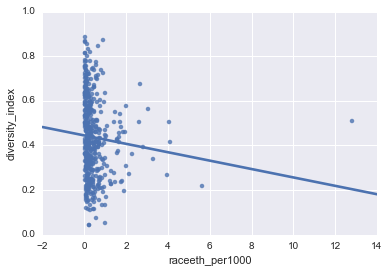

In [57]:
# Plotting scatterplot
sns.regplot(race_comp2.raceeth_per1000, race_comp2.diversity_index, ci=None)

In [58]:
result = sm.OLS(race_comp2.diversity_index, race_comp2.raceeth_per1000).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 01 Dec 2015   Prob (F-statistic):           1.82e-22
Time:                        16:31:54   Log-Likelihood:                -268.29
No. Observations:                 474   AIC:                             538.6
Df Residuals:                     473   BIC:                             542.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
raceeth_per1000     0.2106      0.021     10.269      0.000         0.170     0.251
==============================================================================
Omnibus:                      299.426   Durbin-Watson:                   0.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7348.177
Skew:                          -2.278   Prob(JB):                         0.00
Kurtosis:                      21.743   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

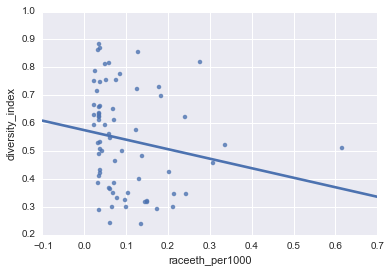

In [59]:
# Filtering by campuses with more than 25000 total students and at least one race/eth hate crime
# and creating a per capita (per 1000) race/eth column
race_comp3 = race_comp[race_comp['total_race/eth'] != 0]
race_comp4 = race_comp3[race_comp['total'] > 25000]
race_comp4.loc[:, 'raceeth_per1000'] = (race_comp['total_race/eth']/race_comp['total'])*1000

sns.regplot(race_comp4.raceeth_per1000, race_comp4.diversity_index, ci=None)

In [60]:
result2 = sm.OLS(race_comp4.diversity_index, race_comp4.raceeth_per1000).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 01 Dec 2015   Prob (F-statistic):           1.82e-22
Time:                        16:31:55   Log-Likelihood:                -268.29
No. Observations:                 474   AIC:                             538.6
Df Residuals:                     473   BIC:                             542.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
raceeth_per1000     0.2106      0.021     10.269      0.000         0.170     0.251
==============================================================================
Omnibus:                      299.426   Durbin-Watson:                   0.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7348.177
Skew:                          -2.278   Prob(JB):                         0.00
Kurtosis:                      21.743   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
# Same as before, but for total hate crime this time
total_comp = pd.merge(total_crime_groups, schooldemos, on='INSTNM')
total_comp.drop_duplicates(subset='INSTNM',keep='first', inplace=True)

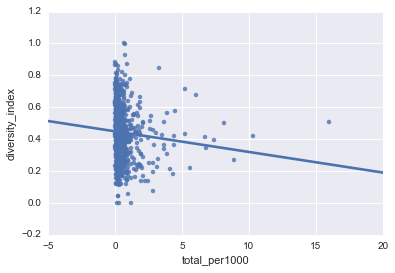

In [62]:
# total_comp.head(5)
# Filtering by campuses with more than 1000 total students and at least one hate crime
# and creating a per capita (per 1000) total_crimes column
total_comp1 = total_comp[total_comp['total_crimes'] != 0]
total_comp2 = total_comp1[total_comp['total'] > 1000]
total_comp2.loc[:, 'total_per1000'] = (total_comp['total_crimes']/total_comp['total'])*1000

# Plotting scatterplot
sns.regplot(total_comp2.total_per1000, total_comp2.diversity_index, ci=None)

In [63]:
result3 = sm.OLS(total_comp2.total_per1000, total_comp2.diversity_index).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 01 Dec 2015   Prob (F-statistic):           1.82e-22
Time:                        16:31:55   Log-Likelihood:                -268.29
No. Observations:                 474   AIC:                             538.6
Df Residuals:                     473   BIC:                             542.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
raceeth_per1000     0.2106      0.021     10.269      0.000         0.170     0.251
==============================================================================
Omnibus:                      299.426   Durbin-Watson:                   0.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7348.177
Skew:                          -2.278   Prob(JB):                         0.00
Kurtosis:                      21.743   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

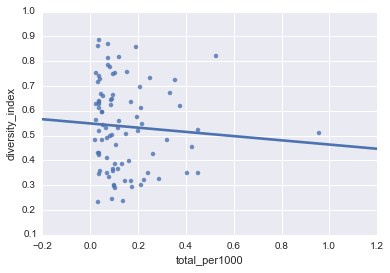

In [64]:
# Filtering by campuses with more than 25000 total students and at least one hate crime
# and creating a per capita (per 1000) total_crimes column
total_comp3 = total_comp[total_comp['total_crimes'] != 0]
total_comp4 = total_comp3[total_comp['total'] > 25000]
total_comp4.loc[:, 'total_per1000'] = (total_comp['total_crimes']/total_comp['total'])*1000

# Plotting scatterplot
sns.regplot(total_comp4.total_per1000, total_comp4.diversity_index, ci=None)

In [65]:
result4 = sm.OLS(total_comp4.total_per1000, total_comp4.diversity_index).fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        diversity_index   R-squared:                       0.182
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     105.4
Date:                Tue, 01 Dec 2015   Prob (F-statistic):           1.82e-22
Time:                        16:31:56   Log-Likelihood:                -268.29
No. Observations:                 474   AIC:                             538.6
Df Residuals:                     473   BIC:                             542.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [95.0% Conf. Int.]
-----------------------------------------------------------------------------------
raceeth_per1000     0.2106      0.021     10.269      0.000         0.170     0.251
==============================================================================
Omnibus:                      299.426   Durbin-Watson:                   0.670
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             7348.177
Skew:                          -2.278   Prob(JB):                         0.00
Kurtosis:                      21.743   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""